# Einsendeaufgabe 2: Springende Bälle und Pendel (100 Punkte)

## Springende Bälle (60 Punkte)
In dieser Übung wollen wir einen NumPy Code entwickeln, den wir in der nächsten Übung optimieren. 

Wir wollen Bälle simulieren, die in einer Box herumspringen. Die Box sei von $x=[0,xmax]$ und $y=[0,ymax]$ definiert. Jede Kugel hat eine Koordinate $c=[x,y]$ und eine Geschwindigkeit $v=[v_x,v_y]$. In jedem Zeitschritt $\Delta t$ (dt) legt die Kugel eine gewisse Strecke zurück.

Es gilt nach den Regeln der Physik

$c[t+\Delta t]=c[t]+\Delta t*v(t)$. 

 
Zusätzlich wirkt in y-Richtung die Schwerkraft, welche die Geschwindigkeit verändert:
 
$v[t+\Delta t]=v[t]+\Delta t*g$. 


Wenn ein Ball an die Wand stößt, (also z.B. $c_0<=0$ oder $c_0>=xmax$ wird er reflektiert, das heißt in erster Näherung $v_0 = -1 * v_0$ für die Geschwindigkeit in dieser Richtung). Damit der Ball in diesem Fall nicht außerhalb der Box landet, müssen Sie berechnen, wie der Ball nun fliegt.

Der Ball stoppt nicht an der Wand, wenn er dort ankommt, sondern  fliegt noch ein Stück in die reflektierte Richtung. Um dies zu beachten, sollten wir die Rechnung noch etwas anpassen. 

Als Beispiel nehmen wir an, dass der Ball über $x=0$ hinaus fliegt.  Wenn wir also $c$ ausrechnen, gilt:  $c_x = c_x + v_x*\Delta t < 0 $.

Damit können wir ausrechnen, wie lange ($\Delta t_2$) unser Ball in die reflektierte Richtung geflogen ist: 

$abs(c_x)=\Delta t_2 * v_x$

also gilt:   
 
$\Delta t_2= \frac{abs(c_x)}{v_x}$. 

Für diese Zeit fliegt der Ball in die andere Richtung. Es gilt also 

$c_x = \Delta t_2 * (-v_x) = abs(c_x)$

<!-- BEGIN QUESTION -->

**Aufgabe:** Implementieren Sie die Funktion `timestep`, welche *einen* Zeitschritt für *einen Ball* simuliert. 

**Hinweis**:
- Die Entscheidungen, die Sie hier treffen, haben großen Einfluss auf die Performance. Es ist sehr wichtig, geeignete Kontroll- und Datenstrukturen zu wählen, um Overhead durch zu viele Objekte oder unnötige Kopien zu vermeiden.
- Wir haben hier eine schrittweise Simulation, dabei ist die Größe der Zeitschritte entscheidend, d.h. der Ball sollte in einem Zeitschritt nicht zu viel Strecke zurück gelegt haben. Daher sollte gelten: $\Delta_t \ll v$. Außerdem soll der Ball sich auch etwas bewegen können, daher muss $xmax,ymax \gg v$ sein.

_Points:_ 5

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [33]:
def timestep(c, v, dt, g, xmax, ymax):
    """
    Simuliert einen Zeitschritt für einen Ball in einer Box.
    
    Parameter:
    c (numpy array): Die aktuelle Position des Balls [x, y].
    v (numpy array): Die aktuelle Geschwindigkeit des Balls [vx, vy].
    dt (float): Der Zeitschritt.
    g (numpy array): Die Beschleuniung durch die Schwerkraft in y-Richtung.
    xmax (float): Die maximale x-Koordinate der Box.
    ymax (float): Die maximale y-Koordinate der Box.
    
    Rückgabe:
    tuple: Die neue Position und Geschwindigkeit des Balls.
    """
    # Update der Geschwindigkeit in y-Richtung aufgrund der Schwerkraft
    v[1] += g[1] * dt
    
    # Vorläufige neue Position berechnen
    new_c = c + v * dt

    # Kollissionen mit den Wänden prüfen (x-axis)
    if new_c[0] < 0:
        t2 = abs(new_c[0]) / abs(v[0])
        new_c[0] = t2 * (-v[0])
        v[0] = -v[0]
    elif new_c[0] > xmax:
        t2 = abs(new_c[0] - xmax) / abs(v[0])
        new_c[0] = xmax - t2 * (-v[0])
        v[0] = -v[0]
        
    # Kollissionen mit dem Boden und der Decke prüfen (y-axis)
    if new_c[1] < 0:
        t2 = abs(new_c[1]) / abs(v[1])
        new_c[1] = t2 * (-v[1])
        v[1] = -v[1]
    elif new_c[1] > ymax:
        t2 = abs(new_c[1] - ymax) / abs(v[1])
        new_c[1] = ymax - t2 * (-v[1])
        v[1] = -v[1]

    return new_c, v

# Beispielparameter für einen einzelnen Zeitschritt
c = np.array([50.0, 50.0])
v = np.array([20.0, 0.0])
dt = 0.1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 100
ymax = 100

# Aufruf der Funktion timestep für einen einzelnen Zeitschrit
new_c, new_v = timestep(c, v, dt, g, xmax, ymax)

print(f"Neue Position: {new_c}")
print(f"Neue Geschwindigkeit: {new_v}")


Neue Position: [52.     49.9019]
Neue Geschwindigkeit: [20.    -0.981]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie die Bewegung des Balls. Der Ball sollte mit der Zeit an Höhe verlieren (durch die Schwerkraft).

Hinweis: Simulation und Visualisierung müssen getrennt sein (für die nächste Aufgabe).

_Points:_ 5

In [34]:
def simulate_ball_motion(c, v, dt, g, xmax, ymax, steps):
    """
    Simuliert die Bewegung eines Balls in einer Box über eine gegebene Anzahl von Zeitschritten.

    Parameter:
    c (numpy array): Die Startposition des Balls als numpy-Array [x, y].
    v (numpy array): Die Startgeschwindigkeit des Balls als numpy-Array [vx, vy].
    dt (float): Der Zeitschritt für die Simulation.
    g (numpy array): Die Beschleunigung durch die Schwerkraft als numpy-Array [gx, gy].
    xmax (float): Die maximale x-Koordinate der Box (Breite der Box).
    ymax (float): Die maximale y-Koordinate der Box (Höhe der Box).
    steps (int): Die Anzahl der Zeitschritte, über die die Simulation ausgeführt wird.

    Rückgabe:
    numpy array: Ein Array der Positionen des Balls zu jedem Zeitschritt. 
    """
    positions = [c.copy()]
    for _ in range(steps):
        c, v = timestep(c, v, dt, g, xmax, ymax)
        positions.append(c.copy())
    return np.array(positions)

# Anfangsbedingungen (Vorschlag)
dt = 0.1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 100
ymax = 100
steps = 100

# Startposition und -geschwindigkeit
c = np.array([50.0, 50.0])
v = np.array([20.0, 0.0])

positions = simulate_ball_motion(c, v, dt, g, xmax, ymax, steps)

# Positionen ausgeben
print("Positionen des Balls:")
print(positions)

Positionen des Balls:
[[ 50.      50.    ]
 [ 52.      49.9019]
 [ 54.      49.7057]
 [ 56.      49.4114]
 [ 58.      49.019 ]
 [ 60.      48.5285]
 [ 62.      47.9399]
 [ 64.      47.2532]
 [ 66.      46.4684]
 [ 68.      45.5855]
 [ 70.      44.6045]
 [ 72.      43.5254]
 [ 74.      42.3482]
 [ 76.      41.0729]
 [ 78.      39.6995]
 [ 80.      38.228 ]
 [ 82.      36.6584]
 [ 84.      34.9907]
 [ 86.      33.2249]
 [ 88.      31.361 ]
 [ 90.      29.399 ]
 [ 92.      27.3389]
 [ 94.      25.1807]
 [ 96.      22.9244]
 [ 98.      20.57  ]
 [100.      18.1175]
 [102.      15.5669]
 [100.      12.9182]
 [ 98.      10.1714]
 [ 96.       7.3265]
 [ 94.       4.3835]
 [ 92.       1.3424]
 [ 90.       1.7968]
 [ 88.       4.8379]
 [ 86.       7.7809]
 [ 84.      10.6258]
 [ 82.      13.3726]
 [ 80.      16.0213]
 [ 78.      18.5719]
 [ 76.      21.0244]
 [ 74.      23.3788]
 [ 72.      25.6351]
 [ 70.      27.7933]
 [ 68.      29.8534]
 [ 66.      31.8154]
 [ 64.      33.6793]
 [ 62.      

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Ein Ball ist jedoch langweilig, daher wollen wir als nächstes mehrere Bälle simulieren.  
Schreiben Sie eine neue Funktion, `timestep_balls`, welche einen Array mit Koordinaten (shape=(N,2)) und einen Array mit Geschwindigkeiten (shape=(N,2)) übergeben bekommt und für alle Bälle einen Zeitschritt berechnet. 

Achten Sie darauf, dass der Code performant ist und verwenden Sie NumPys interne Vektorisierung mit der Slicing Syntax.  Für den Augenblick ignorieren wir, dass die Bälle zusammenstoßen können. 

Hinweis: 
- Das Array `c` sollte diese Form haben: 

$c = \left[\begin{array}{rr}                                 
x_0 & y_0 \\ 
x_1 & y_1 \\ 
x_2 & y_2 \\ 
\dots \\ 
x_{n-1} & y_{n-1} \\ 
\end{array}\right]$ 

- Das Array `v` sollte diese Form haben: 

$v = \left[\begin{array}{rr}                                 
v^x_0 & v^y_0 \\ 
v^x_1 & v^y_1 \\ 
v^x_2 & v^y_2 \\ 
\dots\\ 
v^x_{n-1} & v^y_{n-1} \\ 
\end{array}\right]$ 

_Points:_ 10

In [35]:
def timestep_balls(c, v, dt, g, xmax, ymax):
    """
    Simuliert einen timestep mit mehreren Bällen.
    """
    # Update Geschwindigkeiten auf Grund Schwerkraft
    v[:, 1] += g[1] * dt
    
    # Update positions
    new_c = c + v * dt

     # Kollissionen mit den Wänden prüfen (x-axis)
    mask_x_neg = new_c[:, 0] < 0
    mask_x_pos = new_c[:, 0] > xmax
    v[mask_x_neg | mask_x_pos, 0] = -v[mask_x_neg | mask_x_pos, 0]
    new_c[mask_x_neg, 0] = -new_c[mask_x_neg, 0]
    new_c[mask_x_pos, 0] = 2 * xmax - new_c[mask_x_pos, 0]

    # Kollissionen mit dem Boden und der Decke prüfen (y-axis)is)
    mask_y_neg = new_c[:, 1] < 0
    mask_y_pos = new_c[:, 1] > ymax
    v[mask_y_neg | mask_y_pos, 1] = -v[mask_y_neg | mask_y_pos, 1]
    new_c[mask_y_neg, 1] = -new_c[mask_y_neg, 1]
    new_c[mask_y_pos, 1] = 2 * ymax - new_c[mask_y_pos, 1]

    return new_c, v

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie die Bewegung der Bälle.

Tipp: Trennen Sie Simulation und Visualisierung.

_Points:_ 10

In [36]:
# Simulation
def simulate_balls_motion(c, v, dt, g, xmax, ymax, steps):
    positions = [c.copy()]
    for _ in range(steps):
        c, v = timestep_balls(c, v, dt, g, xmax, ymax)
        positions.append(c.copy())
    return np.array(positions)

In [37]:
dt = 1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 1000
ymax = 1000
steps = 250

# Anzahl Bälle
N = 10
rng = np.random.default_rng(seed=123)
# Startpositionen
c = xmax * rng.random((N, 2))
# Startgeschwindigkeiten
v = 10 * rng.random((N, 2))

# Simulation ausführen
positions = simulate_balls_motion(c, v, dt, g, xmax, ymax, steps)

# Positionen ausgeben
print("Positionen des Balls:")
print(positions)

Positionen des Balls:
[[[682.35186325  53.8210188 ]
  [220.35987277 184.3718107 ]
  [175.90590109 812.09450666]
  ...
  [741.46705223 629.94020459]
  [927.40725853 231.90818861]
  [799.12512862 518.16503685]]

 [[684.6674195   45.67005873]
  [225.33776246 180.3890571 ]
  [177.74928096 802.43345582]
  ...
  [748.7745716  622.90885749]
  [935.37769406 230.75040573]
  [802.11950758 513.62545769]]

 [[686.98297574  27.70909867]
  [230.31565214 166.59630351]
  [179.59266083 782.96240499]
  ...
  [756.08209096 606.0675104 ]
  [943.34812959 219.78262286]
  [805.11388653 499.27587853]]

 ...

 [[743.39018721  33.62292204]
  [545.12348535  77.41108058]
  [633.06410991 201.57390022]
  ...
  [553.73185444 327.79387547]
  [904.07527042  94.46196354]
  [458.2688902  294.86940525]]

 [[741.07463096  45.09196197]
  [540.14559567 101.01383417]
  [634.90748978 309.63284939]
  ...
  [561.0393738  413.30522257]
  [912.04570595  95.61974641]
  [455.27451124 368.80982609]]

 [[738.75907471  46.7510019 ]
  

<!-- END QUESTION -->

## Leistungsanalyse ohne Visualisierung

<!-- BEGIN QUESTION -->

**Aufgabe:** Analysieren Sie zunächst die Leistung der Ball-Simulation ohne Visualisierung mit Scalene!
Simulieren Sie dazu 100 Bälle für 100 Zeitschritte und verwenden Sie eine Abtastfrequenz von $0.0001$.

*Hinweis:* Wir haben die Initialisierungsfunktion aus dem Profiling entfernt, da sie ansonsten zu dominant wäre.
Wenn Sie den Code richtig optimiert haben, sollte die Funktion zu über 95% im nativen Modus ausgeführt werden.

_Points:_ 15

In [38]:
%load_ext scalene

The scalene extension is already loaded. To reload it, use:
  %reload_ext scalene


In [21]:
# Anfangsbedingungen (Vorschlag)
dt = 1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 1000
ymax = 1000
steps = 1000

# Anzahl Bälle
N = 100
rng = np.random.default_rng(seed=123)
# Startpositionen
c = xmax * rng.random((N, 2))
# Startgeschwindigkeiten
v = 10 * rng.random((N, 2))

In [41]:
# Anfangsbedingungen
dt = 1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 1000
ymax = 1000
steps = 100

# Anzahl Bälle
N = 100
rng = np.random.default_rng(seed=123)
# Startpositionen'
c = xmax * rng.random((N, 2))
# Startgeschwindigkeiten
v = 10 * rng.random((N, 2))

In [42]:
# %%scalene

# Simulation ausführen
positions = simulate_balls_motion(c, v, dt, g, xmax, ymax, steps)

<!-- END QUESTION -->

## Leistungsanalyse mit Visualisierung

<!-- BEGIN QUESTION -->

**Aufgabe:** Die Visualisierung erfordert, dass die Ergebnisse nach jeder Iteration gespeichert werden. Analysieren Sie mit Hilfe von Scalene, wie sich das auf die Performance auswirkt. 

- Wie viel der gesamten Laufzeit kostet dieses Kopieren der Ergebnisse?
- Wie lässt sich das verbessern?

_Points:_ 15

Das reine kopieren kostet ungefähr 20% der gesamten Laufzeit. Das Verwalten eines einzigen Arrays wäre eine Verbesserung.

In [58]:
# Simulation mit Speichern der Ergebnisse
def simulate_balls_motion_with_copy(c, v, dt, g, xmax, ymax, steps):
    positions = [c.copy()]
    for _ in range(steps):
        c, v = timestep_balls(c, v, dt, g, xmax, ymax)
        positions.append(c.copy())
    return np.array(positions)

In [59]:
# Simulation ohne Speichern der Ergebnisse
def simulate_balls_motion_without_copy(c, v, dt, g, xmax, ymax, steps):
    for _ in range(steps):
        c, v = timestep_balls(c, v, dt, g, xmax, ymax)
    return c, v

In [60]:
# Initialisierung der Parameter
# Anfangsbedingungen
dt = 1
g = np.array([0, -9.81], dtype=np.float64)
xmax = 1000
ymax = 1000
steps = 100

# Anzahl Bälle
N = 100
rng = np.random.default_rng(seed=123)
# Startpositionen
c = xmax * rng.random((N, 2))
# Startgeschwindigkeiten
v = 10 * rng.random((N, 2))


In [61]:
%%scalene

# Simulation mit Speichern der Ergebnisse ausführen
positions_with_copy = simulate_balls_motion_with_copy(c.copy(), v.copy(), dt, g, xmax, ymax, steps)

Scalene: The specified code did not run for long enough to profile.
By default, Scalene only profiles code in the file executed and its subdirectories.
To track the time spent in all files, use the `--profile-all` option.


In [62]:
%%scalene

# Simulation ohne Speichern der Ergebnisse ausführen
final_c, final_v = simulate_balls_motion_without_copy(c.copy(), v.copy(), dt, g, xmax, ymax, steps)

Scalene: The specified code did not run for long enough to profile.
By default, Scalene only profiles code in the file executed and its subdirectories.
To track the time spent in all files, use the `--profile-all` option.


<!-- END QUESTION -->

## Einfaches Pendel (40 Punkte)

Die Bewegung eines einfachen Pendels kann man mit der Gleichung

$\theta^{''}(t) +\frac{b}{m}\theta^{'}(t) +\frac{g}{L}\theta(t) = 0$ 

beschrieben, wobei gilt:

- $\theta$ : Ausrichtungs-Wingel
- $b$ : Dämpfung (z.b. durch Luftwiderstand)
- $m$ : Masse des Pendel-Körpers
- $g$ : Erdbeschleunigung 
- $L$ : Länge des Pendels
- $\theta^{'}$: Winkel-Geschwindigkeit
- $\theta^{''}$: Winkel-Beschleunigung

Die Ausrichtungen x, y werden mit Hilfe von $\theta$ berechnet:

$ x = L * sin(\theta) $

$ y = -L * cos(\theta) $

Der Ursprung des Pendels liegt bei (0,0).

Das Pendel sei Anfangs zu $\frac{\pi}{3}$ ausgerichtet und hat eine Gechwindigkeit von 0. 

<!-- BEGIN QUESTION -->

**Aufgabe:** Berechnen Sie die Bewegung des Pendels für $t=[0,...,15]$ für 20000 Zeitschritte. Verwenden Sie die SciPy funktion `integrate.solve_ivp`.

_Points:_ 10

In [4]:
import numpy as np 
from scipy.integrate import solve_ivp 
from numba import njit

# Anfangsbedingungen
L = 1
m = 1
b = 0.5
g = 9.81
steps = 20000
T = 15
theta0 = np.pi/3 
omega0 = 0

@njit 
def pendulum(t, y): 
    theta, omega = y 
    theta_dot = omega 
    omega_dot = -(b/m)*omega - (g/L)*np.sin(theta) 
    return [theta_dot, omega_dot]

#Initial conditions
y0 = [theta0, omega0]

#Time span
t_span = [0, 15]

#Time points
t = np.linspace(t_span[0], t_span[1], steps)

#Solve the differential equation
sol = solve_ivp(pendulum, t_span, y0, t_eval=t)

#Calculate x and y positions
x = L * np.sin(sol.y[0]) 
y = -L * np.cos(sol.y[0])

#Print the results
#for i in range(len(t)): print(f"t = {t[i]}, x = {x[i]}, y = {y[i]}")

<!-- END QUESTION -->

**Aufgabe:** Die Funktion ` scipy.integrate.solve_ivp` bietet verschiedene Methoden zur Lösung an [[1]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). Vergleichen Sie die Performance für die Methoden, die keine weiteren Eingaben erwarten (RK45, RK23 und DOP853). 

_Points:_ 3

In [6]:
import timeit

rk45_timeit = timeit.timeit('solve_ivp(pendulum, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], num_steps), method="RK45")', setup=____, number=1000)
rk23_timeit = timeit.timeit('solve_ivp(pendulum, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], num_steps), method="RK23")', setup=____, number=1000)
dop853_timeit = timeit.timeit('solve_ivp(pendulum, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], num_steps), method="DOP853")', setup=____, number=1000)

TypeError: solve_ivp() missing 3 required positional arguments: 'fun', 't_span', and 'y0'

<!-- BEGIN QUESTION -->

**Aufgabe:** Stellen Sie die x- und y-Position des Pendels über die Zeit in einem Diagramm dar. 
Stellen Sie in einem zweiten Diagramm den Winkel über die Zeit dar.

Hinweis:
- Verwenden Sie die Lösung für die `RK45` Methode. 
- Verwenden Sie Liniendiagramme.

_Points:_ 10

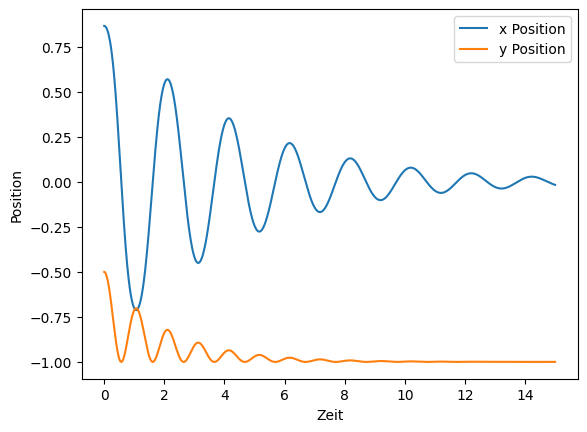

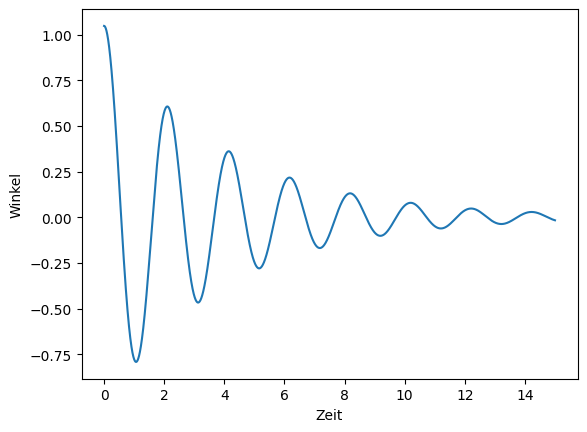

In [8]:
# x, y Positionen berechnen
#x = L * np.sin(sol.y[0])
#y = -L * np.cos(sol.y[0])

import matplotlib.pyplot as plt

# Plot x- und y-Position über die Zeit
plt.figure()
plt.plot(sol.t, x, label='x Position')
plt.plot(sol.t, y, label='y Position')
plt.xlabel('Zeit')
plt.ylabel('Position')
plt.legend()
plt.show()

# Plot Winkel über die Zeit
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.xlabel('Zeit')
plt.ylabel('Winkel')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Stellen Sie den Unterschied zwischen der 'RK45' Methode und der 'RK23' Methode dar. 

Erstellen Sie vier Liniendiagramme:
- x für beide Methoden über der Zeit
- y für beide Methoden über der Zeit
- Absoluter Unterschied von x zwischen beiden Methoden über der Zeit
- Absoluter Unterschied von y zwischen beiden Methoden über der Zeit

_Points:_ 10

ValueError: operands could not be broadcast together with shapes (55,) (181,) 

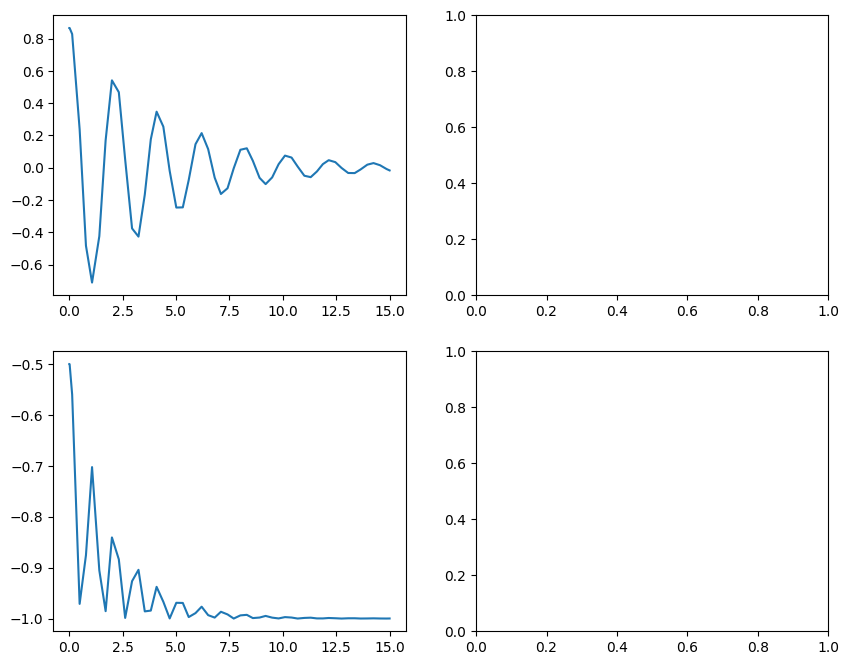

In [17]:
methods = ['RK45', 'RK23']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

x_values_orig = L * np.sin(sol.y[0]) 
y_values_orig = -L * np.cos(sol.y[0])

for i, method in enumerate(methods):
    sol = solve_ivp(pendulum, t_span, y0, method=method, t=t)
    theta_values = sol.y[0]
    x_values = L * np.sin(theta_values)
    y_values = -L * np.cos(theta_values)
    
    axs[0, 0].plot(sol.t, x_values, label=method)
    axs[1, 0].plot(sol.t, y_values, label=method)
    axs[0, 1].plot(sol.t, np.abs(x_values - x_values_orig), label=method)
    axs[1, 1].plot(sol.t, np.abs(y_values - y_values_orig), label=method)
   
    x_vaules_orig = x_values
    y_vaules_orig = y_values

axs[0, 0].set_xlabel('Zeit')
axs[0, 0].set_ylabel('x-Position')
axs[0, 0].legend()

axs[1, 0].set_xlabel('Zeit')
axs[1, 0].set_ylabel('y-Position')
axs[1, 0].legend()

axs[0, 1].set_xlabel('Zeit')
axs[0, 1].set_ylabel('Absoluter Unterschied in x')
axs[0, 1].legend()

axs[1, 1].set_xlabel('Zeit')
axs[1, 1].set_ylabel('Absoluter Unterschied in y')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie das Pendel, sodass es für mindestens eine Periodendauer pendelt.

Hinweis:
- Animieren Sie nicht alle Zeitschritte, sondern z.B. nur jeden 100. Zeitschritt.
- Damit die Animation schneller erstellt wird, können Sie z.B. die zweite Hälfte der Daten verwerfen.
- Tipp für "hvplot": aus `import holoviews as hv` ist [hv.Path() hilfreich](https://holoviews.org/reference/elements/bokeh/Path.html)

_Points:_ 7

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Path   [x,y]
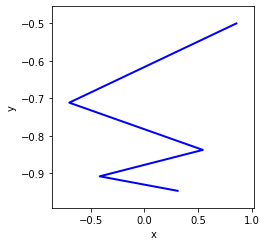

In [5]:
#sol_rk23 = solve_ivp(pendulum, t_span, y0, t=t, method='RK23')

#x_rk23 = L * np.sin(sol_rk23.y[0])
#y_rk23 = -L * np.cos(sol_rk23.y[0])

#diff_x = np.abs(x - x_rk23)
#diff_y = np.abs(y - y_rk23)

#plt.figure()
#plt.plot(sol.t, diff_x, label='Diff x')
#plt.xlabel('Zeit')
#plt.ylabel('Absoluter Unterschied')
#plt.legend()

#plt.figure()
#plt.plot(sol.t, diff_y, label='Diff y')
#plt.xlabel('Zeit')
#plt.ylabel('Absoluter Unterschied')
#plt.legend()

#plt.show()


import numpy as np
import holoviews as hv
from scipy.integrate import odeint
hv.extension('matplotlib')

def pendulum(y, t, b, m, g, L):
    theta, omega = y
    dydt = [omega, -(b/m)*omega - (g/L)*np.sin(theta)]
    return dydt

b = 0.5
m = 1
g = 9.81
L = 1

y0 = np.array([np.pi/3, 0])  # Use np.array instead of list
t = np.arange(0, 10, 0.01)
sol = odeint(pendulum, y0, t, args=(b, m, g, L))

x = L*np.sin(sol[:,0])
y = -L*np.cos(sol[:,0])

x = x[0:len(x)//2:100]
y = y[0:len(y)//2:100]

path = hv.Path((x, y))
path.opts(color='blue', linewidth=2)

<!-- END QUESTION -->

Führen Sie alle Zellen im Notebook aus und speichern Sie es.  
Danach können Sie mit der folgenden Zelle eine HTML-Datei erstellen.  
Eine mögliche `UserWarning` können Sie ignorieren.  
Bitte geben Sie das Notebook als `.ipynb` und `.html` Datei ab.

In [ ]:
#!jupyter nbconvert --to html EA2.ipynb